# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Staring lists
city_names = []
latitudes = []
longitudes = []
temps = []
wind_speed = []
humidity = []
countries = []
cloudiness = []
description = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

for i in range(len(cities)):
    city = cities[i]
    url = query_url + city
    # Log
    print('Checking city number ' + str(i) + ': ' + city)
    page = requests.get(url)
    json_response = page.json()
    if 'cod'in json_response.keys() and json_response['cod'] == 200:
        city_names.append(json_response['name'])
        temps.append(json_response['main']['temp'])
        latitudes.append(json_response['coord']['lat'])
        longitudes.append(json_response['coord']['lon'])
        wind_speed.append(json_response['wind']['speed'])
        humidity.append(json_response['main']['humidity'])
        countries.append(json_response['sys']['country'])
        cloudiness.append(json_response['clouds']['all'])
        description.append(json_response['weather'][0]['description'])

Checking city number 0: jamestown
Checking city number 1: tabou
Checking city number 2: saskylakh
Checking city number 3: tsihombe
Checking city number 4: geraldton
Checking city number 5: taolanaro
Checking city number 6: illoqqortoormiut
Checking city number 7: chuy
Checking city number 8: dikson
Checking city number 9: meckenheim
Checking city number 10: cape town
Checking city number 11: punta arenas
Checking city number 12: provideniya
Checking city number 13: araouane
Checking city number 14: mar del plata
Checking city number 15: atuona
Checking city number 16: rikitea
Checking city number 17: saint george
Checking city number 18: faya
Checking city number 19: butaritari
Checking city number 20: pahrump
Checking city number 21: coihaique
Checking city number 22: otofuke
Checking city number 23: thompson
Checking city number 24: hermanus
Checking city number 25: ushuaia
Checking city number 26: carnarvon
Checking city number 27: saravan
Checking city number 28: soe
Checking city 

Checking city number 235: husavik
Checking city number 236: gravdal
Checking city number 237: yeppoon
Checking city number 238: yar-sale
Checking city number 239: axim
Checking city number 240: henties bay
Checking city number 241: harnosand
Checking city number 242: qasigiannguit
Checking city number 243: abu samrah
Checking city number 244: bin qirdan
Checking city number 245: yichun
Checking city number 246: treinta y tres
Checking city number 247: talnakh
Checking city number 248: grand river south east
Checking city number 249: grand centre
Checking city number 250: cidreira
Checking city number 251: cuamba
Checking city number 252: kungurtug
Checking city number 253: verkhnyaya inta
Checking city number 254: ponta delgada
Checking city number 255: karratha
Checking city number 256: santa vitoria do palmar
Checking city number 257: atambua
Checking city number 258: mata
Checking city number 259: portland
Checking city number 260: olafsvik
Checking city number 261: saint anthony
Ch

Checking city number 468: kassala
Checking city number 469: leh
Checking city number 470: sorland
Checking city number 471: khasan
Checking city number 472: necochea
Checking city number 473: vila velha
Checking city number 474: rio rancho
Checking city number 475: hihifo
Checking city number 476: gaoua
Checking city number 477: movila
Checking city number 478: takoradi
Checking city number 479: hagere hiywet
Checking city number 480: san vicente
Checking city number 481: puerto leguizamo
Checking city number 482: bugiri
Checking city number 483: ilhabela
Checking city number 484: camana
Checking city number 485: zapolyarnyy
Checking city number 486: meulaboh
Checking city number 487: cockburn town
Checking city number 488: maltahohe
Checking city number 489: miranda
Checking city number 490: namtsy
Checking city number 491: kandi
Checking city number 492: berlevag
Checking city number 493: esso
Checking city number 494: mount isa
Checking city number 495: kiama
Checking city number 49

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame(data = {
        'city'        : city_names,
        'lat'         : latitudes,
        'lng'         : longitudes,
        'temp'        : temps,
        'wind speed'  : wind_speed,
        'humidity'    : humidity,
        'cloudiness'  : cloudiness,
        'description' : description,
        'country'     : countries})

weather_data.to_csv('cities_df.csv', index=False)

In [5]:
weather_data

,city,lat,lng,temp,wind speed,humidity,cloudiness,description,country
0,Jamestown,-33.21,138.60,7.69,2.69,90,0,clear sky,AU
1,Tabou,4.42,-7.36,28.19,3.97,76,29,light rain,CI
2,Saskylakh,71.97,114.09,-19.68,3.25,97,0,clear sky,RU
3,Geraldton,49.72,-86.95,2.00,1.50,100,75,broken clouds,CA
4,Chuy,-33.69,-53.46,21.99,2.73,76,100,overcast clouds,UY
5,Dikson,73.51,80.55,-11.76,2.99,87,100,overcast clouds,RU
6,Meckenheim,50.63,7.02,9.19,3.10,76,20,few clouds,DE
7,Cape Town,-33.93,18.42,16.71,12.30,82,75,broken clouds,ZA
8,Punta Arenas,-53.16,-70.91,5.00,11.30,48,75,light intensity shower rain,CL
9,Provideniya,64.42,-173.23,-0.04,9.58,98,100,snow,RU


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

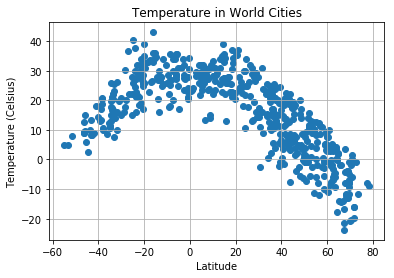

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

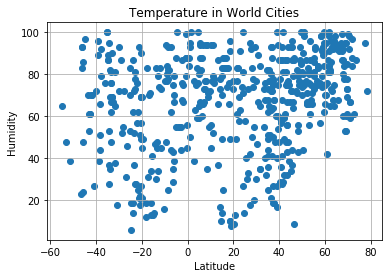

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

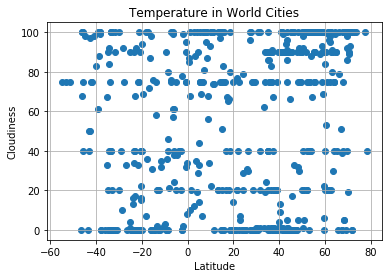

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

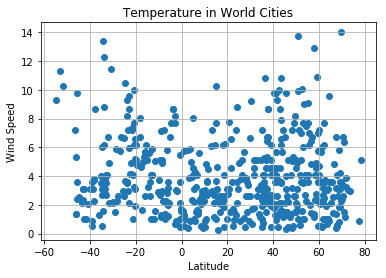

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values, xlabel, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(title)


    # Label plot and annotate the line equation
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")


    # Print r square value
    print(f"The r-squared is: {rvalue}")


    # Show plot
    plt.show()


In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data[weather_data["lat"] > 0]
southern_hemisphere = weather_data[weather_data["lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.58x +35.02
The r-squared is: -0.8480154442546374


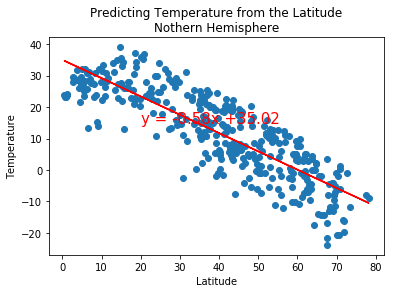

In [24]:
# Perform a linear regression on latitude vs. temperature

x_values, y_values = northern_hemisphere["lat"], northern_hemisphere["temp"]

lin_reg_plot(x_values, y_values, 'Latitude', 'Temperature',
             'Predicting Temperature from the Latitude\nNorthern Hemisphere')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.45x +33.13
The r-squared is: 0.7123132342176256


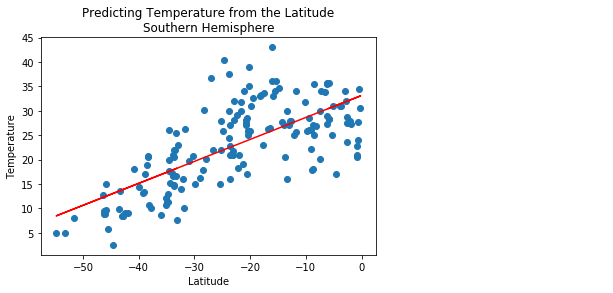

In [25]:
# Perform a linear regression on latitude vs. temperature

x_values, y_values = southern_hemisphere["lat"], southern_hemisphere["temp"]

lin_reg_plot(x_values, y_values, 'Latitude', 'Temperature',
             'Predicting Temperature from the Latitude\nSouthern Hemisphere')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.24x +60.61
The r-squared is: 0.22638246387185604


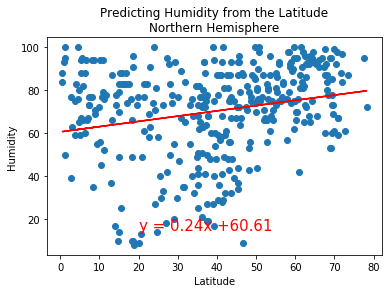

In [29]:
# Perform a linear regression on latitude vs. humidity

x_values, y_values = northern_hemisphere["lat"], northern_hemisphere["humidity"]
lin_reg_plot(x_values, y_values, 'Latitude', 'Humidity',
             'Predicting Humidity from the Latitude\nNorthern Hemisphere')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.05x +59.3
The r-squared is: -0.025746383373734257


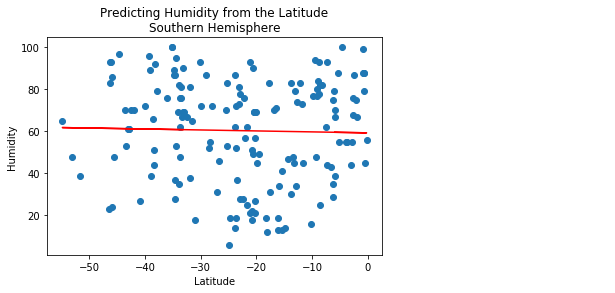

In [30]:
# Perform a linear regression on latitude vs. humidity

x_values, y_values = southern_hemisphere["lat"], southern_hemisphere["humidity"]
lin_reg_plot(x_values, y_values, 'Latitude', 'Humidity',
             'Predicting Humidity from the Latitude\nSouthern Hemisphere')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.28x +46.16
The r-squared is: 0.14281164071390257


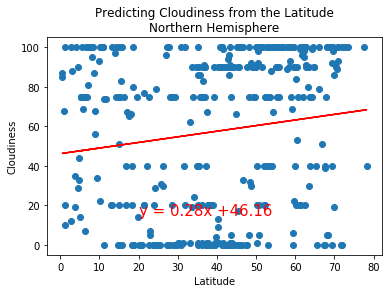

In [32]:
# Perform a linear regression on latitude vs. cloudiness

x_values, y_values = northern_hemisphere["lat"], northern_hemisphere["cloudiness"]
lin_reg_plot(x_values, y_values, 'Latitude', 'Cloudiness',
             'Predicting Cloudiness from the Latitude\nNorthern Hemisphere')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.47x +34.92
The r-squared is: -0.17190739330296512


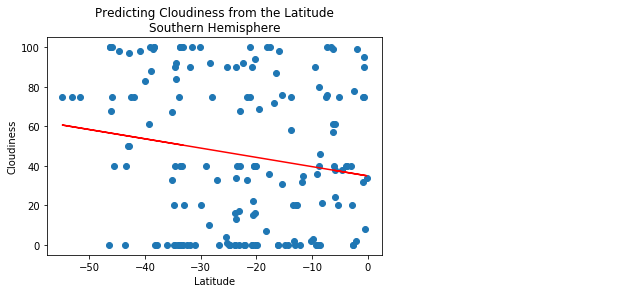

In [33]:
# Perform a linear regression on latitude vs. cloudiness

x_values, y_values = southern_hemisphere["lat"], southern_hemisphere["cloudiness"]
lin_reg_plot(x_values, y_values, 'Latitude', 'Cloudiness',
             'Predicting Cloudiness from the Latitude\nSouthern Hemisphere')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x +3.13
The r-squared is: 0.10096868994894405


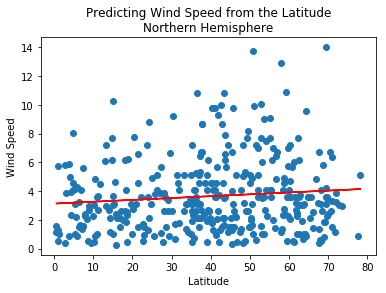

In [34]:
# Perform a linear regression on latitude vs. wind speed

x_values, y_values = northern_hemisphere["lat"], northern_hemisphere["wind speed"]
lin_reg_plot(x_values, y_values, 'Latitude', 'Wind Speed',
             'Predicting Wind Speed from the Latitude\nNorthern Hemisphere')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02x +3.81
The r-squared is: -0.116452083744499


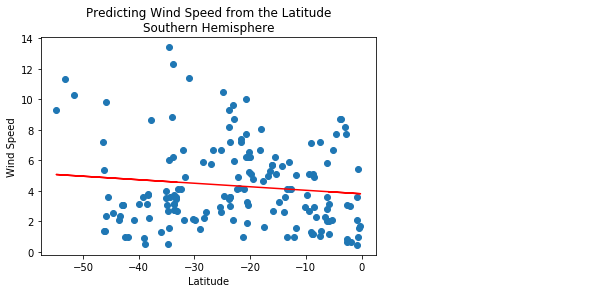

In [35]:
# Perform a linear regression on latitude vs. wind speed

x_values, y_values = southern_hemisphere["lat"], southern_hemisphere["wind speed"]
lin_reg_plot(x_values, y_values, 'Latitude', 'Wind Speed',
             'Predicting Wind Speed from the Latitude\nSouthern Hemisphere')